In [3]:
import networkx as nx
G=nx.read_gml('./data/dolphins/dolphins.gml')

In [4]:
A = nx.adjacency_matrix(G)

In [113]:
import numpy as np
L_norm= nx.normalized_laplacian_matrix(G)
A = nx.adjacency_matrix(G).todense()
deg = A.sum(axis=1)
deg =np.squeeze(np.array(deg))
D_hf_inv=np.diag(deg**-0.5)
D=np.diag(deg)
L=D-A
L_n=np.matmul(np.matmul(D_hf_inv,L),D_hf_inv)
L_norm=L_n

In [114]:
import numpy as np
vals,vec=np.linalg.eig(L_n)

In [115]:
# sort
vec = vec[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# use Fiedler value to find best cut to separate data
community_a = vec[:,1] > 0

In [116]:
V=list(G.nodes)
cluster_a=[]
cluster_b=[]
for i,x in enumerate(community_a):
    if x:
        cluster_a.append(V[i])
    else:
        cluster_b.append(V[i])
print (cluster_a)
print(cluster_b)

['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'PL', 'Quasi', 'Ripplefluke', 'SN89', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig']
['Beak', 'Bumper', 'CCL', 'Cross', 'Double', 'Fish', 'Five', 'Fork', 'Grin', 'Haecksel', 'Hook', 'Jonah', 'Kringel', 'MN105', 'MN60', 'MN83', 'Oscar', 'Patchback', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN9', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Vau', 'Whitetip', 'Zap', 'Zipfel']


/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


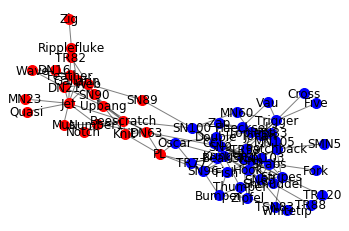

In [117]:
pos=nx.spring_layout(G) # positions for all nodes
# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=cluster_a,
                       node_color='r',
                       node_size=100)
nx.draw_networkx_nodes(G,pos,
                       nodelist=cluster_b,
                       node_color='b',
                       node_size=100)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(G,pos,
#                        edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                        width=8,alpha=0.5,edge_color='r')
# nx.draw_networkx_edges(G,pos,
#                        edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                        width=8,alpha=0.5,edge_color='b')


# some math labels
labels={v:v for k,v in enumerate(V)}

nx.draw_networkx_labels(G,pos,labels,font_size=12)

plt.axis('off')
plt.show() # display

In [161]:
len(cluster_b)

40

In [93]:
import numpy as np
import pandas as pd
df=pd.read_csv('./data/Circle.csv')
X=df['x'].to_numpy()
Y=df['y'].to_numpy()
points=np.vstack((X, Y)).T

In [94]:
def get_edge_weight(i,j):
    dis=np.sum((points[i]-points[j])**2)
    sigma_sq=0.005
    return np.exp(-(dis/sigma_sq))

In [95]:
A=np.zeros(shape=(points.shape[0],points.shape[0]))

In [96]:
for i in range(points.shape[0]):
    for j in range(points.shape[0]):
        A[i][j]=get_edge_weight(i,j)

In [97]:
D = np.diag(np.squeeze(np.array(A.sum(axis=1))))
L = D-A
print(L)

[[ 8.40608748e+00 -6.62518533e-02 -3.53069346e-06 ... -1.55095461e-09
  -4.09783583e-13 -1.02594945e-17]
 [-6.62518533e-02  6.63303385e+00 -2.58317857e-02 ... -2.77781507e-04
  -8.18882181e-07 -1.70377632e-10]
 [-3.53069346e-06 -2.58317857e-02  8.89325827e+00 ... -3.87433383e-01
  -3.22872779e-02 -1.63404369e-04]
 ...
 [-1.55095461e-09 -2.77781507e-04 -3.87433383e-01 ...  1.09584082e+01
  -3.03359448e-01 -4.51328937e-03]
 [-4.09783583e-13 -8.18882181e-07 -3.22872779e-02 ... -3.03359448e-01
   1.00152524e+01 -2.13641308e-01]
 [-1.02594945e-17 -1.70377632e-10 -1.63404369e-04 ... -4.51328937e-03
  -2.13641308e-01  1.16374081e+01]]


In [98]:
vals,vec=np.linalg.eig(L)
# sort
vec = vec[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

data=vec[:,:2]
data.shape

(400, 2)

In [99]:
from sklearn.cluster import KMeans,SpectralClustering
kmeans = KMeans(n_clusters=2).fit(data)
circle_labels=kmeans.labels_

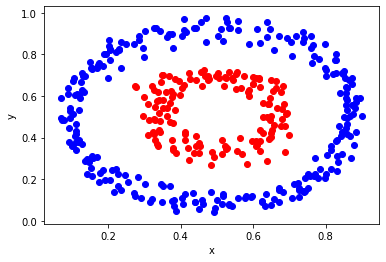

In [100]:
import matplotlib.pyplot as plt
X=points[circle_labels==1]
Y=points[circle_labels==0]
plt.scatter(X[:,0],X[:,1],color='r')
plt.scatter(Y[:,0],Y[:,1],color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[(0, 0), (0, 3), (0, 2), (0, 1), (1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
{'weight': 16}
{'weight': 9}
{'weight': 6}
{'weight': 3}
{'weight': 43}
{'weight': 2}
{'weight': 1}
{'weight': 33}
{'weight': 13}
{'weight': 33}
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
done
{0, 2, 3}
[(0, 0), (0, 3), (0, 2), (2, 2), (2, 3), (3, 3)]
{'weight': 62}
{'weight': 10}
{'weight': 8}
{'weight': 33}
{'weight': 13}
{'weight': 33}
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
done
{0, 2}


/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


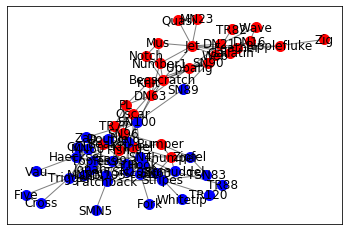

In [190]:
import networkx as nx
import community as comm
G=nx.read_gml('./data/dolphins/dolphins.gml')

def compute_modularity_change(I_G,I,J):
    V=list(I_G.nodes)
    A=nx.adjacency_matrix(I_G).todense()
    print(A.shape)
    q_o=0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(i==j):
                M=np.sum(A)
                S=np.squeeze(np.array(np.sum(A,axis=0)))
                q_o+=(A[i,j]-(S[i]*S[j])/M)/(2*M)
    q_n=0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(i==j or (V[i]==I and V[j]==J) or (V[i]==J and V[j]==I)):
                M=np.sum(A)
                S=np.squeeze(np.array(np.sum(A,axis=0)))
                q_n+=((A[i,j]-S[i]*S[j])/M)/(2*M)
    dq=q_n-q_o
    return dq

def union_communities(orig_part,fr,to):
    if to>fr:
        fr,to=to,fr
    for k,v in orig_part.items():
        if v==fr:
            orig_part[k]=to
    return orig_part

def unite_partitions(I_G,original_partition):
    V=list(I_G.nodes)
    mx_del_q=-1000006
    best_neighbor_pair=(-1,-1)
    for i in V:
        for j in V:
            if i==j:
                continue
            delta_Q=compute_modularity_change(I_G,i,j)
            if delta_Q>=mx_del_q:
                mx_del_q=delta_Q
                best_neighbor_pair=(i,j)
    partition=union_communities(original_partition,best_neighbor_pair[0],best_neighbor_pair[1])
    print("done")
    return partition
        

partition=comm.best_partition(G)

while(len(set(partition.values()))>2):
    I_G=comm.induced_graph(partition,G)
    print(I_G.edges)
    for e in I_G.edges:
        print(I_G.get_edge_data(*e))
    partition_ig=unite_partitions(I_G,partition)
    partition=partition_ig
    print(set(partition.values()))
    
    
    

pos=nx.spring_layout(G)

list_nodes=[nodes for nodes in partition.keys() if partition[nodes]==list(set(partition.values()))[0]]
nx.draw_networkx_nodes(G,pos,list_nodes,node_size=100,node_color='r')

list_nodes=[nodes for nodes in partition.keys() if partition[nodes]==list(set(partition.values()))[1]]
nx.draw_networkx_nodes(G,pos,list_nodes,node_size=100,node_color='b')

nx.draw_networkx_edges(G,pos,alpha=0.5)

V=list(G.nodes)
labels={v:v for k,v in enumerate(V)}

nx.draw_networkx_labels(G,pos,labels,font_size=12)

plt.show()

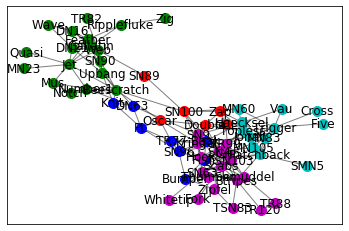

In [195]:
import networkx as nx
import community as comm
import matplotlib.pyplot as plt
G=nx.read_gml('./data/dolphins/dolphins.gml')
partition=comm.best_partition(G)
communities=list(set(partition.values()))

pos=nx.spring_layout(G)
color=['b','g','r','c','m','y','k']


for community in communities:
    list_nodes=[nodes for nodes in partition.keys() if partition[nodes]==community]
    nx.draw_networkx_nodes(G,pos,list_nodes,node_size=100,node_color=color[community])
    
nx.draw_networkx_edges(G,pos,alpha=0.5)

V=list(G.nodes)
labels={v:v for k,v in enumerate(V)}

nx.draw_networkx_labels(G,pos,labels,font_size=12)

plt.show()

In [107]:
print("partition at level", 1,"is", community.partition_at_level(dendo, 1).values())

partition at level 1 is dict_values([0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 3, 1, 2, 0, 3, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 1, 3])


In [183]:
list(I_G.nodes)

[0, 1, 3, 4]